In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
from matplotlib.ticker import FuncFormatter
import matplotlib
import numpy as np
import ternary  
import matplotlib.colors as mcolors
import seaborn as sns

In [2]:
os.chdir("/Users/naroacorettisanchez/Documents/GitHub/MultifunctionalVehicleFleets/results/bidding_5sec_0.5bid")



In [3]:
extension = 'csv'

#Food rips
food_filenames =[i for i in glob.glob('package_trips_*.{}'.format(extension))]

#User trips
user_filenames =[i for i in glob.glob('people_trips_*.{}'.format(extension))]


In [4]:
numitems_food = len(food_filenames)
print('Num sims food: ', numitems_food)

numitems_people = len(user_filenames)
print('Num sims people: ', numitems_people)

Num sims food:  225
Num sims people:  225


In [5]:
df_total_food = []

#TEMPORARY FIX 
for f in food_filenames:
 temp_f = pd.read_csv(f)
 temp_f['MaxBiddingTime'] = 0.5 ######################### REMOVE ################################
 df_total_food.append(temp_f)

df_total_user = []

for f in user_filenames:
 temp_f = pd.read_csv(f)
 temp_f['MaxBiddingTime'] = 0.5 ######################### REMOVE ################################
 df_total_user.append(temp_f)

In [6]:
os.chdir("/Users/naroacorettisanchez/Documents/GitHub/MultifunctionalVehicleFleets/results/bidding_5sec")

In [7]:
extension = 'csv'

#Food rips
food_filenames =[i for i in glob.glob('package_trips_*.{}'.format(extension))]

#User trips
user_filenames =[i for i in glob.glob('people_trips_*.{}'.format(extension))]

In [8]:
numitems_food = len(food_filenames)
print('Num sims food: ', numitems_food)

numitems_people = len(user_filenames)
print('Num sims people: ', numitems_people)

Num sims food:  80
Num sims people:  80


In [9]:

for f in food_filenames:
 temp_f = pd.read_csv(f)
 df_total_food.append(temp_f)



for f in user_filenames:
 temp_f = pd.read_csv(f)
 df_total_user.append(temp_f)

In [10]:
#Mertics - FOOD
i =0 

column_names= ['MaxBiddingTime', 'UrgencyWeight','WaitWeight','ProximityWeight','Pct_served','Avg_wait', 'Min_wait', 'Max_wait', 'Wait_stdv', 'Q10', 'Q50','Q90']
metrics_food = pd.DataFrame(columns=column_names)


for sim_food in df_total_food:
  
  biddingT = sim_food['MaxBiddingTime'][1]
  w_urgency = sim_food['UrgencyWeight'][1]
  w_wait = sim_food['WaitWeight'][1]
  w_proximity = sim_food['ProximityWeight'][1]

  #Compute aveage wait 
  temp_p_served= sim_food.loc[sim_food['Trip Served']==True]
  sum=temp_p_served['Wait Time (min)'].sum()
  len=temp_p_served['Wait Time (min)'].size
  average_wait_p=sum/len

  #Compute max, min and stdev wait
  min_wait =  temp_p_served['Wait Time (min)'].min()
  max_wait =  temp_p_served['Wait Time (min)'].max()
  stdev_wait = temp_p_served['Wait Time (min)'].std()

  #Percentiles
  q5= temp_p_served['Wait Time (min)'].quantile(0.1)
  q50= temp_p_served['Wait Time (min)'].quantile(0.5)
  q95=temp_p_served['Wait Time (min)'].quantile(0.9)

  #Compute percentage of served trips
  count_served=sim_food.loc[sim_food['Trip Served']==True].shape[0]
  count_unserved=sim_food.loc[sim_food['Trip Served']==False].shape[0]
  pct_served_p=(count_served)/(count_served+count_unserved)*100

  #Save
  metrics_food = metrics_food.append(pd.Series([biddingT, w_urgency, w_wait,w_proximity , pct_served_p,average_wait_p, min_wait, max_wait, stdev_wait, q5, q50, q95], index=column_names), ignore_index=True)

  i+=1


print(metrics_food.head())


   MaxBiddingTime  UrgencyWeight  WaitWeight  ProximityWeight  Pct_served  \
0             0.5            0.0        0.25             0.75       100.0   
1             0.5            1.0        0.00             0.00       100.0   
2             0.5            0.0        0.25             0.75       100.0   
3             0.5            0.5        0.25             0.25       100.0   
4             0.5            0.0        0.00             1.00       100.0   

   Avg_wait  Min_wait   Max_wait  Wait_stdv       Q10       Q50       Q90  
0  4.128857      0.25  25.750000   2.889122  1.083333  3.500000  8.083333  
1  4.465677      0.25  28.333333   3.029783  1.083333  3.833333  8.583333  
2  4.130337      0.25  25.750000   2.867941  1.083333  3.500000  8.083333  
3  4.195777      0.25  19.833333   2.900469  1.083333  3.583333  8.166667  
4  4.148000      0.25  25.833333   2.891965  1.083333  3.500000  8.083333  


In [11]:
#Mertics - user
i =0 

column_names= ['MaxBiddingTime', 'UrgencyWeight','WaitWeight','ProximityWeight','Pct_served','Avg_wait', 'Min_wait', 'Max_wait', 'Wait_stdv', 'Q10', 'Q50','Q90']
metrics_user = pd.DataFrame(columns=column_names)


for sim in df_total_user:
  
  biddingT = sim['MaxBiddingTime'][1]
  w_urgency = sim['UrgencyWeight'][1]
  w_wait = sim['WaitWeight'][1]
  w_proximity = sim['ProximityWeight'][1]

  #Compute aveage wait 
  temp_p_served= sim.loc[sim_food['Trip Served']==True]
  sum=temp_p_served['Wait Time (min)'].sum()
  len=temp_p_served['Wait Time (min)'].size
  average_wait_p=sum/len

  #Compute max, min and stdev wait
  min_wait =  temp_p_served['Wait Time (min)'].min()
  max_wait =  temp_p_served['Wait Time (min)'].max()
  stdev_wait = temp_p_served['Wait Time (min)'].std()

  #Percentiles
  q5= temp_p_served['Wait Time (min)'].quantile(0.1)
  q50= temp_p_served['Wait Time (min)'].quantile(0.5)
  q95=temp_p_served['Wait Time (min)'].quantile(0.9)

  #Compute percentage of served trips
  count_served=sim.loc[sim['Trip Served']==True].shape[0]
  count_unserved=sim.loc[sim['Trip Served']==False].shape[0]
  pct_served_p=(count_served)/(count_served+count_unserved)*100

  #Save
  metrics_user = metrics_user.append(pd.Series([biddingT, w_urgency, w_wait,w_proximity , pct_served_p,average_wait_p, min_wait, max_wait, stdev_wait, q5, q50, q95], index=column_names), ignore_index=True)

  i+=1


print(metrics_user.head())

   MaxBiddingTime  UrgencyWeight  WaitWeight  ProximityWeight  Pct_served  \
0             0.5           0.50        0.50             0.00       100.0   
1             0.5           0.50        0.00             0.50       100.0   
2             0.5           0.25        0.75             0.00       100.0   
3             0.5           0.00        0.50             0.50       100.0   
4             0.5           0.00        0.75             0.25       100.0   

   Avg_wait  Min_wait   Max_wait  Wait_stdv       Q10       Q50       Q90  
0  4.322225      0.25  26.000000   3.216238  0.916667  3.500000  8.833333  
1  4.098321      0.25  22.500000   3.038970  0.916667  3.333333  8.333333  
2  4.338482      0.25  23.000000   3.166411  0.916667  3.583333  8.750000  
3  4.245592      0.25  23.916667   3.257035  0.916667  3.416667  9.000000  
4  4.157780      0.25  19.166667   3.152456  0.916667  3.250000  8.750000  


In [13]:
correlation_matrix = metrics_food[['MaxBiddingTime','UrgencyWeight', 'WaitWeight', 'ProximityWeight', 'Pct_served', 'Avg_wait', 'Min_wait', 'Max_wait', 'Wait_stdv', 'Q10', 'Q50', 'Q90']].corr()

print(correlation_matrix)

                 MaxBiddingTime  UrgencyWeight  WaitWeight  ProximityWeight  \
MaxBiddingTime         1.000000       0.047015    0.047015         0.047015   
UrgencyWeight          0.047015       1.000000   -0.472414        -0.472414   
WaitWeight             0.047015      -0.472414    1.000000        -0.472414   
ProximityWeight        0.047015      -0.472414   -0.472414         1.000000   
Pct_served                  NaN            NaN         NaN              NaN   
Avg_wait              -0.050447       0.422527    0.286853        -0.776585   
Min_wait                    NaN            NaN         NaN              NaN   
Max_wait               0.070085       0.035558    0.137604        -0.202881   
Wait_stdv             -0.039820       0.298011    0.288478        -0.645212   
Q10                   -0.002897       0.320406    0.300096        -0.671871   
Q50                   -0.091875       0.413688    0.295056        -0.774237   
Q90                   -0.068830       0.420716    0.

In [14]:
correlation_matrix_u = metrics_user[['MaxBiddingTime','UrgencyWeight', 'WaitWeight', 'ProximityWeight', 'Pct_served', 'Avg_wait', 'Min_wait', 'Max_wait', 'Wait_stdv', 'Q10', 'Q50', 'Q90']].corr()

print(correlation_matrix_u)

                 MaxBiddingTime  UrgencyWeight  WaitWeight  ProximityWeight  \
MaxBiddingTime         1.000000       0.047015    0.047015         0.047015   
UrgencyWeight          0.047015       1.000000   -0.472414        -0.472414   
WaitWeight             0.047015      -0.472414    1.000000        -0.472414   
ProximityWeight        0.047015      -0.472414   -0.472414         1.000000   
Pct_served                  NaN            NaN         NaN              NaN   
Avg_wait               0.204202       0.058495    0.308270        -0.398932   
Min_wait                    NaN            NaN         NaN              NaN   
Max_wait               0.058506       0.216853    0.168195        -0.398731   
Wait_stdv             -0.010119      -0.090132    0.287955        -0.237140   
Q10                    0.252350       0.292795    0.005911        -0.304415   
Q50                    0.372308       0.302117    0.214920        -0.534500   
Q90                    0.018125      -0.201034    0.

In [15]:
condition = (metrics_food['UrgencyWeight'] != 0) | (metrics_food['WaitWeight'] != 0) | (metrics_food['ProximityWeight'] != 0)
filtered_df_food = metrics_food[condition]

shape_metrics_food = metrics_food.shape
shape_filtered_df_food = filtered_df_food.shape


# To get just the number of rows, you can access shape[0]
num_rows_metrics_food = shape_metrics_food[0]
num_rows_filtered_df_food = shape_filtered_df_food[0]

print("Number of rows in metrics_food:", num_rows_metrics_food)
print("Number of rows in filtered_df_food:", num_rows_filtered_df_food)

Number of rows in metrics_food: 305
Number of rows in filtered_df_food: 300


In [16]:

group_columns = ['MaxBiddingTime', 'UrgencyWeight', 'WaitWeight', 'ProximityWeight']


metrics_food_grouped = filtered_df_food.groupby(group_columns).agg({
    'Pct_served': 'mean',
    'Avg_wait': 'mean',
    'Min_wait': 'mean',
    'Max_wait': 'mean',
    'Wait_stdv': 'mean',
    'Q10': 'mean',
    'Q50': 'mean',
    'Q90': 'mean'
}).reset_index()

In [17]:
metrics_food_grouped

,MaxBiddingTime,UrgencyWeight,WaitWeight,ProximityWeight,Pct_served,Avg_wait,Min_wait,Max_wait,Wait_stdv,Q10,Q50,Q90
0,0.5,0.00,0.00,1.00,100.0,4.125126,0.25,25.244444,2.851161,1.077778,3.527778,8.021111
1,0.5,0.00,0.25,0.75,100.0,4.123535,0.25,23.966667,2.859245,1.072222,3.522222,8.027778
2,0.5,0.00,0.50,0.50,100.0,4.131327,0.25,24.011111,2.864035,1.072222,3.527778,8.050000
3,0.5,0.00,0.75,0.25,100.0,4.147237,0.25,24.816667,2.875313,1.073333,3.561111,8.044444
4,0.5,0.00,1.00,0.00,100.0,4.464885,0.25,25.700000,3.012370,1.153333,3.844444,8.555556
5,0.5,0.25,0.00,0.75,100.0,4.241862,0.25,22.650000,2.922264,1.077778,3.627778,8.235556
6,0.5,0.25,0.25,0.50,100.0,4.224999,0.25,23.616667,2.894710,1.081111,3.611111,8.185556
7,0.5,0.25,0.50,0.25,100.0,4.195326,0.25,21.788889,2.854698,1.077778,3.611111,8.172222
8,0.5,0.25,0.75,0.00,100.0,4.456141,0.25,25.055556,2.994456,1.155556,3.833333,8.544444
9,0.5,0.50,0.00,0.50,100.0,4.195802,0.25,23.738889,2.866951,1.083333,3.594444,8.154444


In [18]:
condition_r = (metrics_food['UrgencyWeight'] == 0)  & (metrics_food['WaitWeight'] == 0) & (metrics_food['ProximityWeight'] == 0)
base_df_food = metrics_food[condition_r]
print(base_df_food )

     MaxBiddingTime  UrgencyWeight  WaitWeight  ProximityWeight  Pct_served  \
229             0.0            0.0         0.0              0.0       100.0   
247             0.0            0.0         0.0              0.0       100.0   
248             0.0            0.0         0.0              0.0       100.0   
258             0.0            0.0         0.0              0.0       100.0   
271             0.0            0.0         0.0              0.0       100.0   

     Avg_wait  Min_wait   Max_wait  Wait_stdv       Q10       Q50       Q90  
229  4.461532      0.25  30.500000   3.035028  1.166667  3.833333  8.583333  
247  4.465677      0.25  28.333333   3.029783  1.083333  3.833333  8.583333  
248  4.394711      0.25  26.500000   2.947826  1.166667  3.750000  8.416667  
258  4.492945      0.25  21.250000   2.981025  1.166667  3.916667  8.666667  
271  4.466351      0.25  24.916667   2.973314  1.166667  3.833333  8.583333  


In [19]:
group_columns = ['MaxBiddingTime', 'UrgencyWeight', 'WaitWeight', 'ProximityWeight']


metrics_food_grouped_baseline = base_df_food.groupby(group_columns).agg({
    'Pct_served': 'mean',
    'Avg_wait': 'mean',
    'Min_wait': 'mean',
    'Max_wait': 'mean',
    'Wait_stdv': 'mean',
    'Q10': 'mean',
    'Q50': 'mean',
    'Q90': 'mean'
}).reset_index()

In [20]:
metrics_food_grouped_baseline 

,MaxBiddingTime,UrgencyWeight,WaitWeight,ProximityWeight,Pct_served,Avg_wait,Min_wait,Max_wait,Wait_stdv,Q10,Q50,Q90
0,0.0,0.0,0.0,0.0,100.0,4.456243,0.25,26.3,2.993395,1.15,3.833333,8.566667


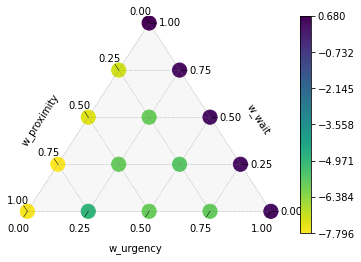

In [21]:

############ MAX BIDDING OF 1 MIN  ############ 


df = metrics_food_grouped.loc[(metrics_food_grouped['MaxBiddingTime']==1.0)]
df_2 = metrics_food_grouped_baseline

# Extract the data
x = df['UrgencyWeight']
y = df['WaitWeight']
z = df['ProximityWeight']
avg_wait = (df['Avg_wait']- df_2['Avg_wait'][0])/df_2['Avg_wait'][0]*100   # Color based on Avg_wait


# Normalize 'Avg_wait' values to a range suitable for color mapping
#norm = mcolors.Normalize(vmin=avg_wait.min(), vmax=avg_wait.max())
#c = norm(avg_wait)

# Create a list of tuples for the points
points = [(xi, yi, zi) for xi, yi, zi in zip(x, y, z)]

# Create a ternary plot
scale = 1
figure, tax = ternary.figure(scale=scale)
#tax.resize_drawing_canvas(scale= 2)

#tax.boundary(linewidth=0.1)
tax.gridlines(multiple=0.25, color="gray")
# Set Axis labels and Title
fontsize = 10
offset=0.2
#tax.set_title("Ternary plot - FOOD", fontsize=fontsize)
tax.left_axis_label("w_proximity", fontsize=fontsize, offset=offset)
tax.right_axis_label("w_wait", fontsize=fontsize, offset=offset)
tax.bottom_axis_label("w_urgency", fontsize=fontsize, offset=offset)

# Set ticks
tax.ticks(axis='lbr', linewidth=0.5, multiple=0.25, tick_formats="%.2f", offset=0.03)


# Show the scatter plot with colors based on Avg_wait
scatter = tax.scatter(points, colormap=plt.cm.viridis_r, scientific= True, colorbar=True, c=avg_wait, s=200, cmap=plt.cm.viridis_r, vmin=avg_wait.min(), vmax=avg_wait.max())



# Remove default Matplotlib Axes
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')

ternary.plt.show()


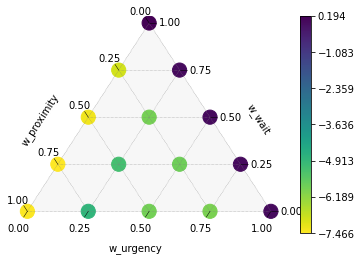

In [22]:

############ MAX BIDDING OF 0.5 MIN  ############ 


df = metrics_food_grouped.loc[(metrics_food_grouped['MaxBiddingTime']==0.5)]
df_2 = metrics_food_grouped_baseline

# Extract the data
x = df['UrgencyWeight']
y = df['WaitWeight']
z = df['ProximityWeight']
avg_wait = (df['Avg_wait']- df_2['Avg_wait'][0])/df_2['Avg_wait'][0]*100   # Color based on Avg_wait


# Normalize 'Avg_wait' values to a range suitable for color mapping
#norm = mcolors.Normalize(vmin=avg_wait.min(), vmax=avg_wait.max())
#c = norm(avg_wait)

# Create a list of tuples for the points
points = [(xi, yi, zi) for xi, yi, zi in zip(x, y, z)]

# Create a ternary plot
scale = 1
figure, tax = ternary.figure(scale=scale)
#tax.resize_drawing_canvas(scale= 2)

#tax.boundary(linewidth=0.1)
tax.gridlines(multiple=0.25, color="gray")
# Set Axis labels and Title
fontsize = 10
offset=0.2
#tax.set_title("Ternary plot - FOOD", fontsize=fontsize)
tax.left_axis_label("w_proximity", fontsize=fontsize, offset=offset)
tax.right_axis_label("w_wait", fontsize=fontsize, offset=offset)
tax.bottom_axis_label("w_urgency", fontsize=fontsize, offset=offset)

# Set ticks
tax.ticks(axis='lbr', linewidth=0.5, multiple=0.25, tick_formats="%.2f", offset=0.03)


# Show the scatter plot with colors based on Avg_wait
scatter = tax.scatter(points, colormap=plt.cm.viridis_r, scientific= True, colorbar=True, c=avg_wait, s=200, cmap=plt.cm.viridis_r, vmin=avg_wait.min(), vmax=avg_wait.max())



# Remove default Matplotlib Axes
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')

ternary.plt.show()

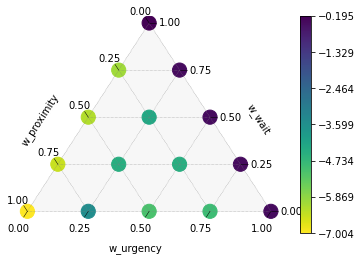

In [23]:

############ MAX BIDDING OF 1 MIN  ############ 


df = metrics_food_grouped.loc[(metrics_food_grouped['MaxBiddingTime']==1.0)]
df_2 = metrics_food_grouped_baseline

# Extract the data
x = df['UrgencyWeight']
y = df['WaitWeight']
z = df['ProximityWeight']
#avg_wait = df['Q50']- df_2['Q50'][0]   # Color based on MEDIAN
avg_wait = (df['Q90']- df_2['Q90'][0])/ df_2['Q90'][0]*100  # Color based on Q90

# Normalize 'Avg_wait' values to a range suitable for color mapping
#norm = mcolors.Normalize(vmin=avg_wait.min(), vmax=avg_wait.max())
#c = norm(avg_wait)

# Create a list of tuples for the points
points = [(xi, yi, zi) for xi, yi, zi in zip(x, y, z)]

# Create a ternary plot
scale = 1
figure, tax = ternary.figure(scale=scale)
#tax.resize_drawing_canvas(scale= 2)

#tax.boundary(linewidth=0.1)
tax.gridlines(multiple=0.25, color="gray")
# Set Axis labels and Title
fontsize = 10
offset=0.2
#tax.set_title("Ternary plot - FOOD", fontsize=fontsize)
tax.left_axis_label("w_proximity", fontsize=fontsize, offset=offset)
tax.right_axis_label("w_wait", fontsize=fontsize, offset=offset)
tax.bottom_axis_label("w_urgency", fontsize=fontsize, offset=offset)

# Set ticks
tax.ticks(axis='lbr', linewidth=0.5, multiple=0.25, tick_formats="%.2f", offset=0.03)


# Show the scatter plot with colors based on Avg_wait
scatter = tax.scatter(points, colormap=plt.cm.viridis_r, scientific= True, colorbar=True, c=avg_wait, s=200, cmap=plt.cm.viridis_r, vmin=avg_wait.min(), vmax=avg_wait.max())



# Remove default Matplotlib Axes
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')

ternary.plt.show()

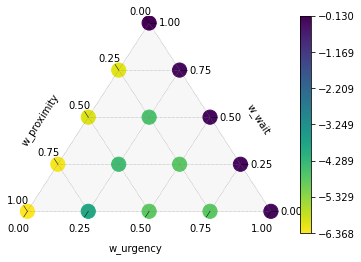

In [24]:

############ MAX BIDDING OF 0.5 MIN  ############ 


df = metrics_food_grouped.loc[(metrics_food_grouped['MaxBiddingTime']==0.5)]
df_2 = metrics_food_grouped_baseline

# Extract the data
x = df['UrgencyWeight']
y = df['WaitWeight']
z = df['ProximityWeight']
#avg_wait = df['Q50']- df_2['Q50'][0]   # Color based on MEDIAN
avg_wait = (df['Q90']- df_2['Q90'][0])/ df_2['Q90'][0]*100  # Color based on Q90

# Normalize 'Avg_wait' values to a range suitable for color mapping
#norm = mcolors.Normalize(vmin=avg_wait.min(), vmax=avg_wait.max())
#c = norm(avg_wait)

# Create a list of tuples for the points
points = [(xi, yi, zi) for xi, yi, zi in zip(x, y, z)]

# Create a ternary plot
scale = 1
figure, tax = ternary.figure(scale=scale)
#tax.resize_drawing_canvas(scale= 2)

#tax.boundary(linewidth=0.1)
tax.gridlines(multiple=0.25, color="gray")
# Set Axis labels and Title
fontsize = 10
offset=0.2
#tax.set_title("Ternary plot - FOOD", fontsize=fontsize)
tax.left_axis_label("w_proximity", fontsize=fontsize, offset=offset)
tax.right_axis_label("w_wait", fontsize=fontsize, offset=offset)
tax.bottom_axis_label("w_urgency", fontsize=fontsize, offset=offset)

# Set ticks
tax.ticks(axis='lbr', linewidth=0.5, multiple=0.25, tick_formats="%.2f", offset=0.03)


# Show the scatter plot with colors based on Avg_wait
scatter = tax.scatter(points, colormap=plt.cm.viridis_r, scientific= True, colorbar=True, c=avg_wait, s=200, cmap=plt.cm.viridis_r, vmin=avg_wait.min(), vmax=avg_wait.max())



# Remove default Matplotlib Axes
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')

ternary.plt.show()

In [25]:
condition = (metrics_user['UrgencyWeight'] != 0) | (metrics_user['WaitWeight'] != 0) | (metrics_user['ProximityWeight'] != 0)
filtered_df_user = metrics_user[condition]

In [26]:
condition_r_u = (metrics_user['UrgencyWeight'] == 0)  & (metrics_user['WaitWeight'] == 0) & (metrics_user['ProximityWeight'] == 0)
base_df_user= metrics_user[condition_r_u]
print(base_df_user )

     MaxBiddingTime  UrgencyWeight  WaitWeight  ProximityWeight  Pct_served  \
226             0.0            0.0         0.0              0.0       100.0   
274             0.0            0.0         0.0              0.0       100.0   
280             0.0            0.0         0.0              0.0       100.0   
296             0.0            0.0         0.0              0.0       100.0   
304             0.0            0.0         0.0              0.0       100.0   

     Avg_wait  Min_wait   Max_wait  Wait_stdv       Q10       Q50       Q90  
226  4.195655      0.25  18.000000   3.015738  1.000000  3.416667  8.583333  
274  4.250917      0.25  26.416667   3.168335  0.916667  3.416667  8.666667  
280  4.255995      0.25  25.083333   3.226429  0.916667  3.500000  8.650000  
296  4.341233      0.25  23.083333   3.259262  0.916667  3.500000  8.916667  
304  4.285336      0.25  22.333333   3.267359  0.916667  3.416667  8.833333  


In [27]:
group_columns = ['MaxBiddingTime', 'UrgencyWeight', 'WaitWeight', 'ProximityWeight']


metrics_user_grouped =filtered_df_user.groupby(group_columns).agg({
    'Pct_served': 'mean',
    'Avg_wait': 'mean',
    'Min_wait': 'mean',
    'Max_wait': 'mean',
    'Wait_stdv': 'mean',
    'Q10': 'mean',
    'Q50': 'mean',
    'Q90': 'mean'
}).reset_index()

In [28]:
metrics_user_grouped

,MaxBiddingTime,UrgencyWeight,WaitWeight,ProximityWeight,Pct_served,Avg_wait,Min_wait,Max_wait,Wait_stdv,Q10,Q50,Q90
0,0.5,0.00,0.00,1.00,100.0,4.232492,0.25,21.677778,3.190464,0.911111,3.366667,8.878889
1,0.5,0.00,0.25,0.75,100.0,4.260907,0.25,22.250000,3.194399,0.900000,3.400000,8.850000
2,0.5,0.00,0.50,0.50,100.0,4.227456,0.25,20.766667,3.182017,0.894444,3.372222,8.808889
3,0.5,0.00,0.75,0.25,100.0,4.186952,0.25,20.533333,3.160254,0.883333,3.333333,8.758889
4,0.5,0.00,1.00,0.00,100.0,4.242303,0.25,23.816667,3.145146,0.950000,3.438889,8.580000
5,0.5,0.25,0.00,0.75,100.0,3.924594,0.25,19.166667,2.779210,0.916667,3.283333,7.710000
6,0.5,0.25,0.25,0.50,100.0,4.024935,0.25,21.422222,2.848872,0.916667,3.344444,8.021111
7,0.5,0.25,0.50,0.25,100.0,4.143570,0.25,20.922222,3.037121,0.922222,3.366667,8.418889
8,0.5,0.25,0.75,0.00,100.0,4.258123,0.25,23.733333,3.138659,0.938889,3.477778,8.604444
9,0.5,0.50,0.00,0.50,100.0,4.141849,0.25,20.088889,3.029004,0.933333,3.366667,8.388889


In [29]:
group_columns = ['MaxBiddingTime', 'UrgencyWeight', 'WaitWeight', 'ProximityWeight']


metrics_user_grouped_baseline =base_df_user.groupby(group_columns).agg({
    'Pct_served': 'mean',
    'Avg_wait': 'mean',
    'Min_wait': 'mean',
    'Max_wait': 'mean',
    'Wait_stdv': 'mean',
    'Q10': 'mean',
    'Q50': 'mean',
    'Q90': 'mean'
}).reset_index()

In [30]:
metrics_user_grouped_baseline

,MaxBiddingTime,UrgencyWeight,WaitWeight,ProximityWeight,Pct_served,Avg_wait,Min_wait,Max_wait,Wait_stdv,Q10,Q50,Q90
0,0.0,0.0,0.0,0.0,100.0,4.265827,0.25,22.983333,3.187425,0.933333,3.45,8.73


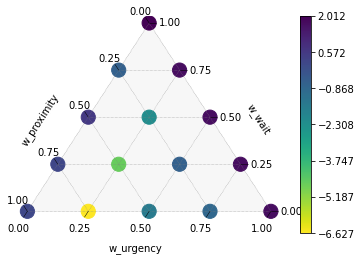

In [31]:
############ MAX BIDDING OF 1 MIN  ############ 


df = metrics_user_grouped.loc[(metrics_user_grouped['MaxBiddingTime']==1)]
df_2 = metrics_user_grouped_baseline

# Extract the data
x = df['UrgencyWeight']
y = df['WaitWeight']
z = df['ProximityWeight']
avg_wait = (df['Avg_wait']- df_2['Avg_wait'][0])/df_2['Avg_wait'][0]*100   # Color based on Avg_wait


# Normalize 'Avg_wait' values to a range suitable for color mapping
#norm = mcolors.Normalize(vmin=avg_wait.min(), vmax=avg_wait.max())
#c = norm(avg_wait)

# Create a list of tuples for the points
points = [(xi, yi, zi) for xi, yi, zi in zip(x, y, z)]

# Create a ternary plot
scale = 1
figure, tax = ternary.figure(scale=scale)
#tax.resize_drawing_canvas(scale= 2)

#tax.boundary(linewidth=0.1)
tax.gridlines(multiple=0.25, color="gray")
# Set Axis labels and Title
fontsize = 10
offset=0.2
#tax.set_title("Ternary plot - FOOD", fontsize=fontsize)
tax.left_axis_label("w_proximity", fontsize=fontsize, offset=offset)
tax.right_axis_label("w_wait", fontsize=fontsize, offset=offset)
tax.bottom_axis_label("w_urgency", fontsize=fontsize, offset=offset)

# Set ticks
tax.ticks(axis='lbr', linewidth=0.5, multiple=0.25, tick_formats="%.2f", offset=0.03)


# Show the scatter plot with colors based on Avg_wait
scatter = tax.scatter(points, colormap=plt.cm.viridis_r, scientific= True, colorbar=True, c=avg_wait, s=200, cmap=plt.cm.viridis_r, vmin=avg_wait.min(), vmax=avg_wait.max())



# Remove default Matplotlib Axes
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')

ternary.plt.show()

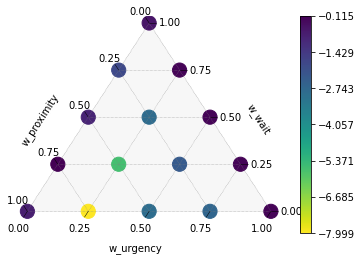

In [32]:
############ MAX BIDDING OF 0.5 MIN  ############ 


df = metrics_user_grouped.loc[(metrics_user_grouped['MaxBiddingTime']==0.5)]
df_2 = metrics_user_grouped_baseline

# Extract the data
x = df['UrgencyWeight']
y = df['WaitWeight']
z = df['ProximityWeight']
avg_wait = (df['Avg_wait']- df_2['Avg_wait'][0])/df_2['Avg_wait'][0]*100   # Color based on Avg_wait


# Normalize 'Avg_wait' values to a range suitable for color mapping
#norm = mcolors.Normalize(vmin=avg_wait.min(), vmax=avg_wait.max())
#c = norm(avg_wait)

# Create a list of tuples for the points
points = [(xi, yi, zi) for xi, yi, zi in zip(x, y, z)]

# Create a ternary plot
scale = 1
figure, tax = ternary.figure(scale=scale)
#tax.resize_drawing_canvas(scale= 2)

#tax.boundary(linewidth=0.1)
tax.gridlines(multiple=0.25, color="gray")
# Set Axis labels and Title
fontsize = 10
offset=0.2
#tax.set_title("Ternary plot - FOOD", fontsize=fontsize)
tax.left_axis_label("w_proximity", fontsize=fontsize, offset=offset)
tax.right_axis_label("w_wait", fontsize=fontsize, offset=offset)
tax.bottom_axis_label("w_urgency", fontsize=fontsize, offset=offset)

# Set ticks
tax.ticks(axis='lbr', linewidth=0.5, multiple=0.25, tick_formats="%.2f", offset=0.03)


# Show the scatter plot with colors based on Avg_wait
scatter = tax.scatter(points, colormap=plt.cm.viridis_r, scientific= True, colorbar=True, c=avg_wait, s=200, cmap=plt.cm.viridis_r, vmin=avg_wait.min(), vmax=avg_wait.max())



# Remove default Matplotlib Axes
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')

ternary.plt.show()

-11.492936235204217


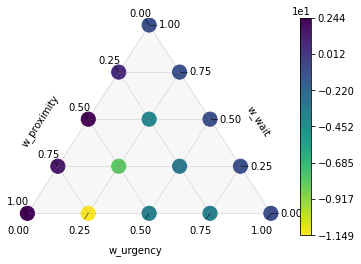

In [49]:

############ MAX BIDDING OF 1 MIN  ############ 


df = metrics_user_grouped.loc[(metrics_user_grouped['MaxBiddingTime']==1)]
df_2 = metrics_user_grouped_baseline

# Extract the data
x = df['UrgencyWeight']
y = df['WaitWeight']
z = df['ProximityWeight']
#avg_wait = df['Q50']- df_2['Q50'][0]   # Color based on MEDIAN
avg_wait = (df['Q90']- df_2['Q90'][0])/ df_2['Q90'][0]*100  # Color based on Q90

# Normalize 'Avg_wait' values to a range suitable for color mapping
#norm = mcolors.Normalize(vmin=avg_wait.min(), vmax=avg_wait.max())
#c = norm(avg_wait)

# Create a list of tuples for the points
points = [(xi, yi, zi) for xi, yi, zi in zip(x, y, z)]

# Create a ternary plot
scale = 1
figure, tax = ternary.figure(scale=scale)
#tax.resize_drawing_canvas(scale= 2)

#tax.boundary(linewidth=0.1)
tax.gridlines(multiple=0.25, color="gray")
# Set Axis labels and Title
fontsize = 10
offset=0.2
#tax.set_title("Ternary plot - FOOD", fontsize=fontsize)
tax.left_axis_label("w_proximity", fontsize=fontsize, offset=offset)
tax.right_axis_label("w_wait", fontsize=fontsize, offset=offset)
tax.bottom_axis_label("w_urgency", fontsize=fontsize, offset=offset)

# Set ticks
tax.ticks(axis='lbr', linewidth=0.5, multiple=0.25, tick_formats="%.2f", offset=0.03)


# Show the scatter plot with colors based on Avg_wait
scatter = tax.scatter(points, colormap=plt.cm.viridis_r, scientific= True, colorbar=True, c=avg_wait, s=200, cmap=plt.cm.viridis_r, vmin=avg_wait.min(), vmax=avg_wait.max())



# Remove default Matplotlib Axes
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')

ternary.plt.show()

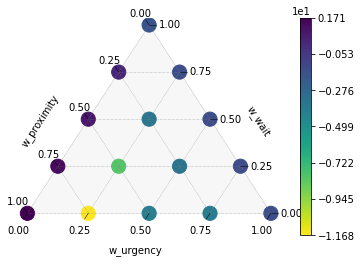

In [34]:
############ MAX BIDDING OF 0.5 MIN  ############ 


df = metrics_user_grouped.loc[(metrics_user_grouped['MaxBiddingTime']==0.5)]
df_2 = metrics_user_grouped_baseline

# Extract the data
x = df['UrgencyWeight']
y = df['WaitWeight']
z = df['ProximityWeight']
#avg_wait = df['Q50']- df_2['Q50'][0]   # Color based on MEDIAN
avg_wait = (df['Q90']- df_2['Q90'][0])/df_2['Q90'][0]*100 # Color based on Q90

# Normalize 'Avg_wait' values to a range suitable for color mapping
#norm = mcolors.Normalize(vmin=avg_wait.min(), vmax=avg_wait.max())
#c = norm(avg_wait)

# Create a list of tuples for the points
points = [(xi, yi, zi) for xi, yi, zi in zip(x, y, z)]

# Create a ternary plot
scale = 1
figure, tax = ternary.figure(scale=scale)
#tax.resize_drawing_canvas(scale= 2)

#tax.boundary(linewidth=0.1)
tax.gridlines(multiple=0.25, color="gray")
# Set Axis labels and Title
fontsize = 10
offset=0.2
#tax.set_title("Ternary plot - FOOD", fontsize=fontsize)
tax.left_axis_label("w_proximity", fontsize=fontsize, offset=offset)
tax.right_axis_label("w_wait", fontsize=fontsize, offset=offset)
tax.bottom_axis_label("w_urgency", fontsize=fontsize, offset=offset)

# Set ticks
tax.ticks(axis='lbr', linewidth=0.5, multiple=0.25, tick_formats="%.2f", offset=0.03)


# Show the scatter plot with colors based on Avg_wait
scatter = tax.scatter(points, colormap=plt.cm.viridis_r, scientific= True, colorbar=True, c=avg_wait, s=200, cmap=plt.cm.viridis_r, vmin=avg_wait.min(), vmax=avg_wait.max())



# Remove default Matplotlib Axes
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')

ternary.plt.show()

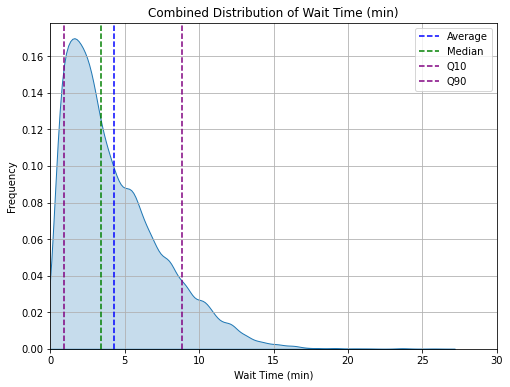

In [44]:
biddingT_sel = 0.5
w_urgency_sel = 0.0
w_wait_sel = 0.25
w_proximity_sel = 0.75

# Initialize an empty list to store wait times from all simulations
wait_times_all_1 = []

# Loop through the simulations and collect wait times
for sim in df_total_user:
    if (
        (sim['MaxBiddingTime'][5] == biddingT_sel)
        and (sim['UrgencyWeight'][5] == w_urgency_sel)
        and (sim['WaitWeight'][5] == w_wait_sel)
        and (sim['ProximityWeight'][5] == w_proximity_sel)
    ):
        wait_times_all_1.extend(sim['Wait Time (min)'])

# Create a single combined plot for all wait times
plt.figure(figsize=(8, 6))
#plt.hist(wait_times_all_1, bins=30, edgecolor='k', alpha=0.7)
#KDE plot
sns.kdeplot(data=wait_times_all_1, fill=True)
plt.xlim(0, 30)
plt.xlabel('Wait Time (min)')
plt.ylabel('Frequency')
plt.title('Combined Distribution of Wait Time (min)')
plt.grid(True)

plt.grid(True)

# Calculate statistics: avg, median, q10, q90
avg_wait_1 = np.mean(wait_times_all_1)
median_wait_1 = np.median(wait_times_all_1)
q10_wait_1 = np.percentile(wait_times_all_1, 10)
q90_wait_1 = np.percentile(wait_times_all_1, 90)

# Add lines for avg, median, q10, and q90
plt.axvline(avg_wait_1, color='blue', linestyle='--', label='Average')
plt.axvline(median_wait_1, color='green', linestyle='--', label='Median')
plt.axvline(q10_wait_1, color='purple', linestyle='--', label='Q10')
plt.axvline(q90_wait_1, color='purple', linestyle='--', label='Q90')

# Add a legend
plt.legend()

plt.show()

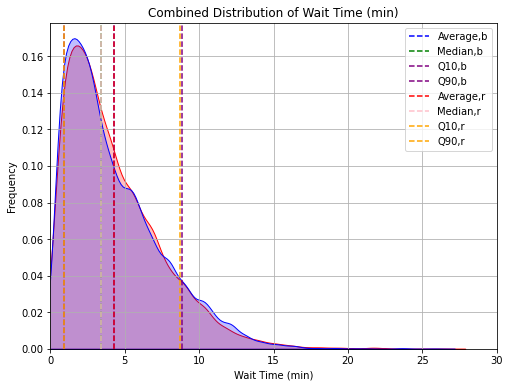

In [45]:
biddingT_sel = 0.0
w_urgency_sel =  0.0
w_wait_sel = 0.0
w_proximity_sel = 0.0

# Initialize an empty list to store wait times from all simulations
wait_times_all = []

# Loop through the simulations and collect wait times
for sim in df_total_user:
    if (
        (sim['MaxBiddingTime'][1] == biddingT_sel)
        and (sim['UrgencyWeight'][1] == w_urgency_sel)
        and (sim['WaitWeight'][1] == w_wait_sel)
        and (sim['ProximityWeight'][1] == w_proximity_sel)
    ):
        wait_times_all.extend(sim['Wait Time (min)'])

# Create a single combined plot for all wait times
plt.figure(figsize=(8, 6))
#plt.hist(wait_times_all, bins=30, edgecolor='k', alpha=0.7)
#KDE plot
sns.kdeplot(data=wait_times_all, fill=True, color='r')
sns.kdeplot(data=wait_times_all_1, fill=True, color= 'b')
plt.xlim(0, 30)
plt.xlabel('Wait Time (min)')
plt.ylabel('Frequency')
plt.title('Combined Distribution of Wait Time (min)')
plt.grid(True)

# Calculate statistics: avg, median, q10, q90
avg_wait = np.mean(wait_times_all)
median_wait = np.median(wait_times_all)
q10_wait = np.percentile(wait_times_all, 10)
q90_wait= np.percentile(wait_times_all, 90)

# Add lines for avg, median, q10, and q90
plt.axvline(avg_wait_1, color='blue', linestyle='--', label='Average,b')
plt.axvline(median_wait_1, color='green', linestyle='--', label='Median,b')
plt.axvline(q10_wait_1, color='purple', linestyle='--', label='Q10,b')
plt.axvline(q90_wait_1, color='purple', linestyle='--', label='Q90,b')
plt.axvline(avg_wait, color='red', linestyle='--', label='Average,r')
plt.axvline(median_wait, color='pink', linestyle='--', label='Median,r')
plt.axvline(q10_wait, color='orange', linestyle='--', label='Q10,r')
plt.axvline(q90_wait, color='orange', linestyle='--', label='Q90,r')

# Add a legend
plt.legend()

In [42]:
#Get the parameter ranges
  
biddingT_range = metrics_user['MaxBiddingTime'].unique()
w_urgency_range= metrics_user['UrgencyWeight'].unique()
w_wait_range = metrics_user['WaitWeight'].unique()
w_proximity_range = metrics_user['ProximityWeight'].unique()

print('MaxBiddingTime: ',biddingT_range)
print('UrgencyWeight: ', w_urgency_range)
print('WaitWeight: ', w_wait_range)
print('ProximityWeight: ', w_proximity_range)

MaxBiddingTime:  [0.5 1.  0. ]
UrgencyWeight:  [0.5  0.25 0.   0.75 1.  ]
WaitWeight:  [0.5  0.   0.75 1.   0.25]
ProximityWeight:  [0.   0.5  0.25 0.75 1.  ]


In [43]:
#Set matrix sizes
i_size=biddingT_range.size
j_size=w_urgency_range.size
l_size=w_wait_range.size
k_size=w_proximity_range.size

In [ ]:
#We have four variables in two axes i+j combined / k+l combined
x_size= i_size*j_size
y_size=k_size*l_size

#Initialize matrices - Full size

wait_matrix_f=np.zeros((x_size,y_size))
served_matrix_f=np.zeros((x_size,y_size))

wait_matrix_u=np.zeros((x_size,y_size))
served_matrix_u=np.zeros((x_size,y_size))

In [ ]:
# Loop to fill in the matrices 

u=-1

for i in range(i_size):

    for j in range(j_size):
        v=0
        u+=1
        for k in range(k_size):
            
            for l in range(l_size):

                #Read values and filter dataframe
                bidT = biddingT_range[i]
                w_u = w_urgency_range[j]
                w_w = w_wait_range[k]
                w_p = w_proximity_range[l]


                #FOOD#
                temp_f=metrics_food.loc[(metrics_food['MaxBiddingTime']==bidT)&(metrics_food['UrgencyWeight']== w_u)&(metrics_food['WaitWeight']== w_w) &(metrics_food['ProximityWeight']== w_p)]
                avg_wait_f = temp_f['Avg_wait'].mean()
                pct_served_f = temp_f['Pct_served'].mean()
              
                #USER#
                temp_u=metrics_user.loc[(metrics_user['MaxBiddingTime']==bidT)&(metrics_user['UrgencyWeight']== w_u)&(metrics_user['WaitWeight']== w_w) &(metrics_user['ProximityWeight']== w_p)]
                avg_wait_u = temp_u['Avg_wait'].mean()
                pct_served_u = temp_u['Pct_served'].mean()
              

                #SAVE DATA
                wait_matrix_f[u,v]=avg_wait_f
                served_matrix_f[u,v]=pct_served_f
                wait_matrix_u[u,v]=avg_wait_u
                served_matrix_u[u,v]=pct_served_u
                
                
                v+=1

In [ ]:

#Process the labels for the combined axis
labels_1= []
for i in range(i_size):
    for j in range(j_size):
        labels_1.append([biddingT_range[i],w_urgency_range[j]])

labels_2 =[]

for k in range(k_size):
    for l in range(l_size):
        labels_2.append([w_wait_range[k],w_proximity_range[l]])

#Create grid
yi = np.arange(0, x_size+1) #shift x and y
xi = np.arange(0, y_size+1)
X, Y = np.meshgrid(xi, yi)

In [ ]:
#### FIGURE 1: WAIT TIMES FOOD

fig = matplotlib.pyplot.gcf()

plt.pcolormesh(X, Y,  wait_matrix_f,cmap=matplotlib.cm.coolwarm)
for i in range(x_size):
    for j in range(y_size):
        plt.text(j,i, round( wait_matrix_f[i,j],2), color="w")
plt.colorbar()
plt.xticks(xi[:-1]+0.5, labels_2, rotation=90)
plt.xlabel("[w_wait, w_proximity]")  ################################# REVIEW IF they're not in the opposite order
plt.yticks(yi[:-1]+0.5, labels_1)
plt.ylabel("[bid_time,w_urgency]")
plt.title('Wait times [min]: FOOD')
fig.set_size_inches(20, 6)
fig.show()

In [ ]:
#### FIGURE 2: SERVED TRIPS FOOD

fig = matplotlib.pyplot.gcf()

plt.pcolormesh(X, Y,  served_matrix_f,cmap=matplotlib.cm.coolwarm_r)
for i in range(x_size):
    for j in range(y_size):
        plt.text(j,i, round( served_matrix_f[i,j],2), color="w")
plt.colorbar()
plt.xticks(xi[:-1]+0.5, labels_2, rotation=90)
plt.xlabel("[w_wait, w_proximity]")  ################################# REVIEW IF they're not in the opposite order
plt.yticks(yi[:-1]+0.5, labels_1)
plt.ylabel("[bid_time,w_urgency]")
plt.title('Served trips [%]: FOOD')
fig.set_size_inches(20, 6)
fig.show()

In [ ]:
#### FIGURE 1: WAIT TIMES USER

fig = matplotlib.pyplot.gcf()

plt.pcolormesh(X, Y,  wait_matrix_u,cmap=matplotlib.cm.coolwarm)
for i in range(x_size):
    for j in range(y_size):
        plt.text(j,i, round( wait_matrix_u[i,j],2), color="w")
plt.colorbar()
plt.xticks(xi[:-1]+0.5, labels_2, rotation=90)
plt.xlabel("[w_wait, w_proximity]")  ################################# REVIEW IF they're not in the opposite order
plt.yticks(yi[:-1]+0.5, labels_1)
plt.ylabel("[bid_time,w_urgency]")
plt.title('Wait times [min]: USER')
fig.set_size_inches(20, 6)
fig.show()

In [ ]:
#### FIGURE 2: SERVED TRIPS USER

fig = matplotlib.pyplot.gcf()

plt.pcolormesh(X, Y,  served_matrix_u,cmap=matplotlib.cm.coolwarm_r)
for i in range(x_size):
    for j in range(y_size):
        plt.text(j,i, round( served_matrix_u[i,j],2), color="w")
plt.colorbar()
plt.xticks(xi[:-1]+0.5, labels_2, rotation=90)
plt.xlabel("[w_wait, w_proximity]")  ################################# REVIEW IF they're not in the opposite order
plt.yticks(yi[:-1]+0.5, labels_1)
plt.ylabel("[bid_time,w_urgency]")
plt.title('Served trips [%]: USER')
fig.set_size_inches(20, 6)
fig.show()